In [1]:
import yfinance
import mplfinance as mpf
import matplotlib. pyplot as plt
import numpy as np
import pandas as pd

from typing import List

# Download Data

In [2]:
data = yfinance.download(
            tickers=['AAPL'],
            start='2021-01-01',
            end=None,
            interval='1d',
            auto_adjust=True,
            prepost=False
        )

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

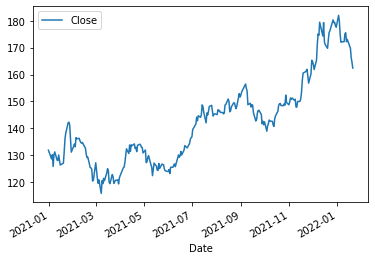

In [3]:
data[['Close']].plot()

In [4]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,133.258497,133.914457,130.912956,131.877014,99116600
2021-01-04,132.701914,132.791359,125.983331,128.617096,143301900
2021-01-05,128.100300,130.932844,127.643112,130.207306,97664900
2021-01-06,126.937458,130.247057,125.605665,125.824318,155088000
2021-01-07,127.573531,130.823500,127.076595,130.117844,109578200


In [5]:
data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-14,171.339996,173.779999,171.089996,173.070007,80355000
2022-01-18,171.509995,172.539993,169.410004,169.800003,90956700
2022-01-19,170.000000,171.080002,165.940002,166.229996,94815000
2022-01-20,166.979996,169.679993,164.179993,164.509995,91420500
2022-01-21,164.419998,166.330002,162.300003,162.410004,122501300


# K-Fold

In [6]:
EMBARGO_RATIO = 0.02
PURGE_RATIO = 0.02

In [27]:
def get_partitions(k: int, data: pd.DataFrame, purge_ratio: float = 0.0, embargo_ratio: float = 0.0, validation_idx=-1):
    start = data.index[0].value
    end = data.index[-1].value
    length = end - start
    
    purge_length = int(length * purge_ratio)
    embargo_ratio = int(length * embargo_ratio)
    
    partition_lenth = length // k
    partitions = np.cumsum([partition_lenth]*k)
    partitions += start
    partitions = np.array([start, *partitions])
    partitions[-1] = end
    
    if purge_ratio > 0:
        processed_partitions = [partitions[0]]
        for i in range(1, len(partitions)):
            processed_partitions.append(partitions[i] - purge_length)
            processed_partitions.append(partitions[i])
            if validation_idx + 1 == i:
                processed_partitions.append(partitions[i] + embargo_ratio)
        processed_partitions = processed_partitions[:-1]
        processed_partitions[-1] = partitions[-1]
    else:
        processed_partitions = partitions
    
    processed_partitions = [pd.Timestamp(timestamp) for timestamp in processed_partitions]
    
    return processed_partitions


def plot_partitions(data: pd.DataFrame, partitions: List[pd.DataFrame], validation_idx: int) -> None:
    max_y = data[['Close']].max()
    ax = data[['Close']].plot()
    ax.legend(loc='upper left')
    ax.set_ylabel('Price')
    for partition in partitions:
        ax.axvline(partition, linewidth=1, linestyle='dotted', color='black')

# Standard Method

In [28]:
partitions = get_partitions(3, data)

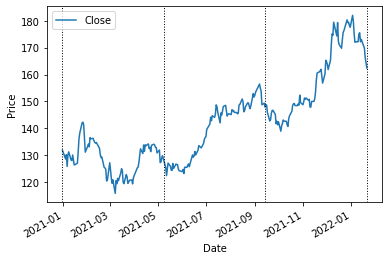

In [29]:
plot_partitions(data, partitions, validation_idx=1)

# Purge

In [18]:
partitions = get_partitions(3, data, purge_ratio=0.05)

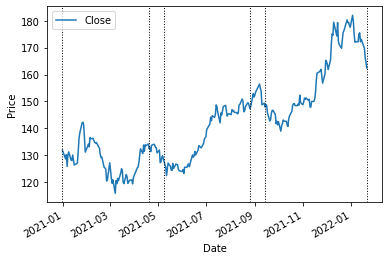

In [19]:
plot_partitions(data, partitions, validation_idx=1)

# Purge and Embargo

In [20]:
partitions = get_partitions(3, data, purge_ratio=0.05, embargo_ratio=0.05, validation_idx=1)

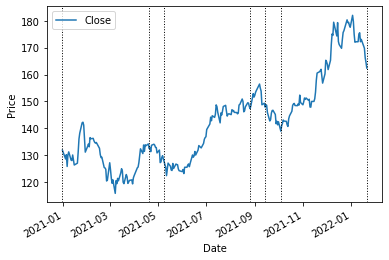

In [21]:
plot_partitions(data, partitions, validation_idx=1)